In [114]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [115]:
risk_f =\
(
    pd
    .read_excel
    ('Risk_Factors.xlsx')
)

ind_ret =\
(
    pd
    .read_excel
    ('Industry_Portfolios.xlsx')
)

/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [116]:
ind_ret["Date"]=\
(
    ind_ret
    .Date
    .apply(lambda x: str(x)
          )
)

ind_ret["Date"]=\
(
    pd
    .to_datetime(ind_ret.Date,
                 format="%Y%m"
                )
)

ind_ret =\
(
    ind_ret
    .set_index("Date")
)

In [117]:
risk_f

,Date,Rf,Rm-Rf,SMB,HML
0,200401,0.07,2.15,2.67,1.55
1,200402,0.06,1.40,-1.17,0.45
2,200403,0.09,-1.32,1.84,0.07
3,200404,0.08,-1.83,-2.59,-1.67
4,200405,0.06,1.17,-0.10,-0.33
...,...,...,...,...,...
115,201308,0.00,-2.69,0.29,-2.46
116,201309,0.00,3.76,2.85,-1.59
117,201310,0.00,4.17,-1.56,1.31
118,201311,0.00,3.12,1.34,-0.33


In [118]:
risk_f["Date"]=\
(
    risk_f
    .Date
    .apply(lambda x: str(x)
          )
)

risk_f["Date"]=\
(
    pd
    .to_datetime(risk_f.Date,
                 format="%Y%m"
                )
)

risk_f =\
(
    risk_f
    .set_index("Date")
)

In [119]:
risk_f

,Rf,Rm-Rf,SMB,HML
Date,,,,
2004-01-01,0.07,2.15,2.67,1.55
2004-02-01,0.06,1.40,-1.17,0.45
2004-03-01,0.09,-1.32,1.84,0.07
2004-04-01,0.08,-1.83,-2.59,-1.67
2004-05-01,0.06,1.17,-0.10,-0.33
...,...,...,...,...
2013-08-01,0.00,-2.69,0.29,-2.46
2013-09-01,0.00,3.76,2.85,-1.59
2013-10-01,0.00,4.17,-1.56,1.31


In [122]:
ind_ex_ret =\
(
    ind_ret
    .subtract(risk_f['Rf'], 
              axis = 0)
)

In [123]:
ind_ex_ret

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
2004-01-01,-0.01,-1.14,-0.69,0.37,4.46,1.34,0.38,3.02,1.85,2.81
2004-02-01,4.19,-0.13,1.89,4.63,-2.98,-0.58,6.03,0.83,2.01,2.10
2004-03-01,-0.18,-1.24,-0.36,-0.22,-2.64,-2.16,0.20,-4.05,1.04,-0.72
2004-04-01,1.34,2.22,-0.25,2.44,-4.99,-0.56,-2.78,3.46,-3.63,-3.84
2004-05-01,-1.95,-1.70,1.55,0.33,4.79,-3.01,0.24,-0.48,1.22,1.80
...,...,...,...,...,...,...,...,...,...,...
2013-08-01,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66
2013-09-01,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83
2013-10-01,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87


In [250]:
factor_load = {}

for i in ind_ex_ret.columns:
    Y =\
    (
        ind_ex_ret[i]
    )
    
    X =\
    (
        sm
        .add_constant(risk_f[['Rm-Rf', 
                              'SMB', 
                              'HML']]
                     )
    )
    
    model =\
    (
        sm.OLS(Y, X).fit()
    )
    
    alpha =\
    (
        model\
        .params['const']
    )
    
    
    factor_load[i] = model.params

In [253]:
factor_l =\
(
    pd
    .DataFrame(factor_load)
)

In [297]:
factors_l =\
(
    factor_l.T
)

factors_l.columns = ['Alpha', 'Fama_French Rm Beta', 'Fama_French SMB Beta', 'Fama_French HML Beta']

In [298]:
factors_l

,Alpha,Fama_French Rm Beta,Fama_French SMB Beta,Fama_French HML Beta
NoDur,0.386704,0.712134,-0.229102,-0.023342
Durbl,-0.474342,1.447452,0.670878,0.240949
Manuf,0.153285,1.142282,0.087388,0.027727
Enrgy,0.523007,1.028354,-0.259360,-0.008158
HiTec,-0.065979,1.152803,0.335674,-0.556947
Telcm,0.200724,0.924137,-0.080299,-0.019063
Shops,0.255941,0.770227,0.280191,-0.039080
Hlth,0.257472,0.751976,-0.212655,-0.143765
Utils,0.474411,0.631827,-0.387961,-0.016881
Other,-0.404412,1.123473,-0.061676,0.547325


In [206]:
sharpe_ratio =\
(
    ind_ex_ret.mean()
    /
    ind_ex_ret.std()
)

sharpe_ratio

NoDur    0.231099
Durbl    0.072356
Manuf    0.166616
Enrgy    0.181708
HiTec    0.118552
Telcm    0.169064
Shops    0.191753
Hlth     0.172529
Utils    0.210948
Other    0.064693
dtype: float64

In [207]:
downside =\
(
    np.minimum(ind_ex_ret, 0)
)

In [208]:
downside

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
2004-01-01,-0.01,-1.14,-0.69,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2004-02-01,0.00,-0.13,0.00,0.00,-2.98,-0.58,0.00,0.00,0.00,0.00
2004-03-01,-0.18,-1.24,-0.36,-0.22,-2.64,-2.16,0.00,-4.05,0.00,-0.72
2004-04-01,0.00,0.00,-0.25,0.00,-4.99,-0.56,-2.78,0.00,-3.63,-3.84
2004-05-01,-1.95,-1.70,0.00,0.00,0.00,-3.01,0.00,-0.48,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
2013-08-01,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66
2013-09-01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2013-10-01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [209]:
downside_r =\
(
    (downside**2).sum()
)

downside_r

NoDur     586.5550
Durbl    3516.1652
Manuf    1616.8533
Enrgy    1953.3711
HiTec    1683.1428
Telcm    1137.6184
Shops     870.1584
Hlth      708.0899
Utils     867.6632
Other    2059.0323
dtype: float64

In [303]:
downside_risk =\
(
    downside_r
    /
    120
)

downside_risk

NoDur     4.887958
Durbl    29.301377
Manuf    13.473778
Enrgy    16.278092
HiTec    14.026190
Telcm     9.480153
Shops     7.251320
Hlth      5.900749
Utils     7.230527
Other    17.158602
dtype: float64

In [211]:
sortino_ratio =\
(
    ind_ex_ret.mean()
    /
    np.sqrt(downside_risk) 
)

sortino_ratio

NoDur    0.350804
Durbl    0.111967
Manuf    0.241260
Enrgy    0.273612
HiTec    0.170620
Telcm    0.244940
Shops    0.293032
Hlth     0.270294
Utils    0.290044
Other    0.087351
dtype: float64

In [190]:
sml_slope

-0.1878095390045705

In [216]:
results = []

for i in ind_ex_ret.columns:
    Y =\
    (
        ind_ex_ret[i]
    )
    
    X =\
    (
        sm
        .add_constant(risk_f['Rm-Rf']
                     )
    )
    
    model =\
    (
        sm.OLS(Y, X).fit()
    )
    
    alpha =\
    (
        model\
        .params['const']
    )
    
    beta =\
        model\
        .params['Rm-Rf']
    
    
    results\
        .append({'Industry': i,
                 'Alpha': alpha,
                 'Beta': beta
                })

In [244]:
results_df =\
(
    pd
    .DataFrame(results)
)

results_df = results_df.set_index('Industry')

In [246]:
treynor_ratio =\
(
    ind_ex_ret.mean()
    /
    results_df['Beta']
)

treynor_ratio

NoDur    1.186372
Durbl    0.367463
Manuf    0.758251
Enrgy    1.143330
HiTec    0.564295
Telcm    0.836363
Shops    0.951258
Hlth     0.971435
Utils    1.452334
Other    0.299781
dtype: float64

In [257]:
jensen_a =\
(
    results_df['Alpha']
)

jensen_a

Industry
NoDur    0.369717
Durbl   -0.417903
Manuf    0.160494
Enrgy    0.504485
HiTec   -0.064024
Telcm    0.194348
Shops    0.274093
Hlth     0.236968
Utils    0.446523
Other   -0.387508
Name: Alpha, dtype: float64

In [286]:
alpha =\
(
    factor_l.T['const']
)

alpha

NoDur    0.386704
Durbl   -0.474342
Manuf    0.153285
Enrgy    0.523007
HiTec   -0.065979
Telcm    0.200724
Shops    0.255941
Hlth     0.257472
Utils    0.474411
Other   -0.404412
Name: const, dtype: float64

In [290]:
metrics =\
(
    pd
    .concat([sharpe_ratio, sortino_ratio, treynor_ratio, jensen_a, alpha], axis = 1)
)

In [294]:
metrics.columns = ['Sharpe Ratio', 'Sortino Ratio', 'Treynor Ratio', "Jensen's Alpha", 'Fama-French Alpha']

In [295]:
metrics

,Sharpe Ratio,Sortino Ratio,Treynor Ratio,Jensen's Alpha,Fama-French Alpha
NoDur,0.231099,0.350804,1.186372,0.369717,0.386704
Durbl,0.072356,0.111967,0.367463,-0.417903,-0.474342
Manuf,0.166616,0.241260,0.758251,0.160494,0.153285
Enrgy,0.181708,0.273612,1.143330,0.504485,0.523007
HiTec,0.118552,0.170620,0.564295,-0.064024,-0.065979
Telcm,0.169064,0.244940,0.836363,0.194348,0.200724
Shops,0.191753,0.293032,0.951258,0.274093,0.255941
Hlth,0.172529,0.270294,0.971435,0.236968,0.257472
Utils,0.210948,0.290044,1.452334,0.446523,0.474411
Other,0.064693,0.087351,0.299781,-0.387508,-0.404412


array([<Axes: title={'center': 'Sharpe Ratio'}>,
       <Axes: title={'center': 'Sortino Ratio'}>,
       <Axes: title={'center': 'Treynor Ratio'}>,
       <Axes: title={'center': "Jensen's Alpha"}>,
       <Axes: title={'center': 'Fama-French Alpha'}>], dtype=object)

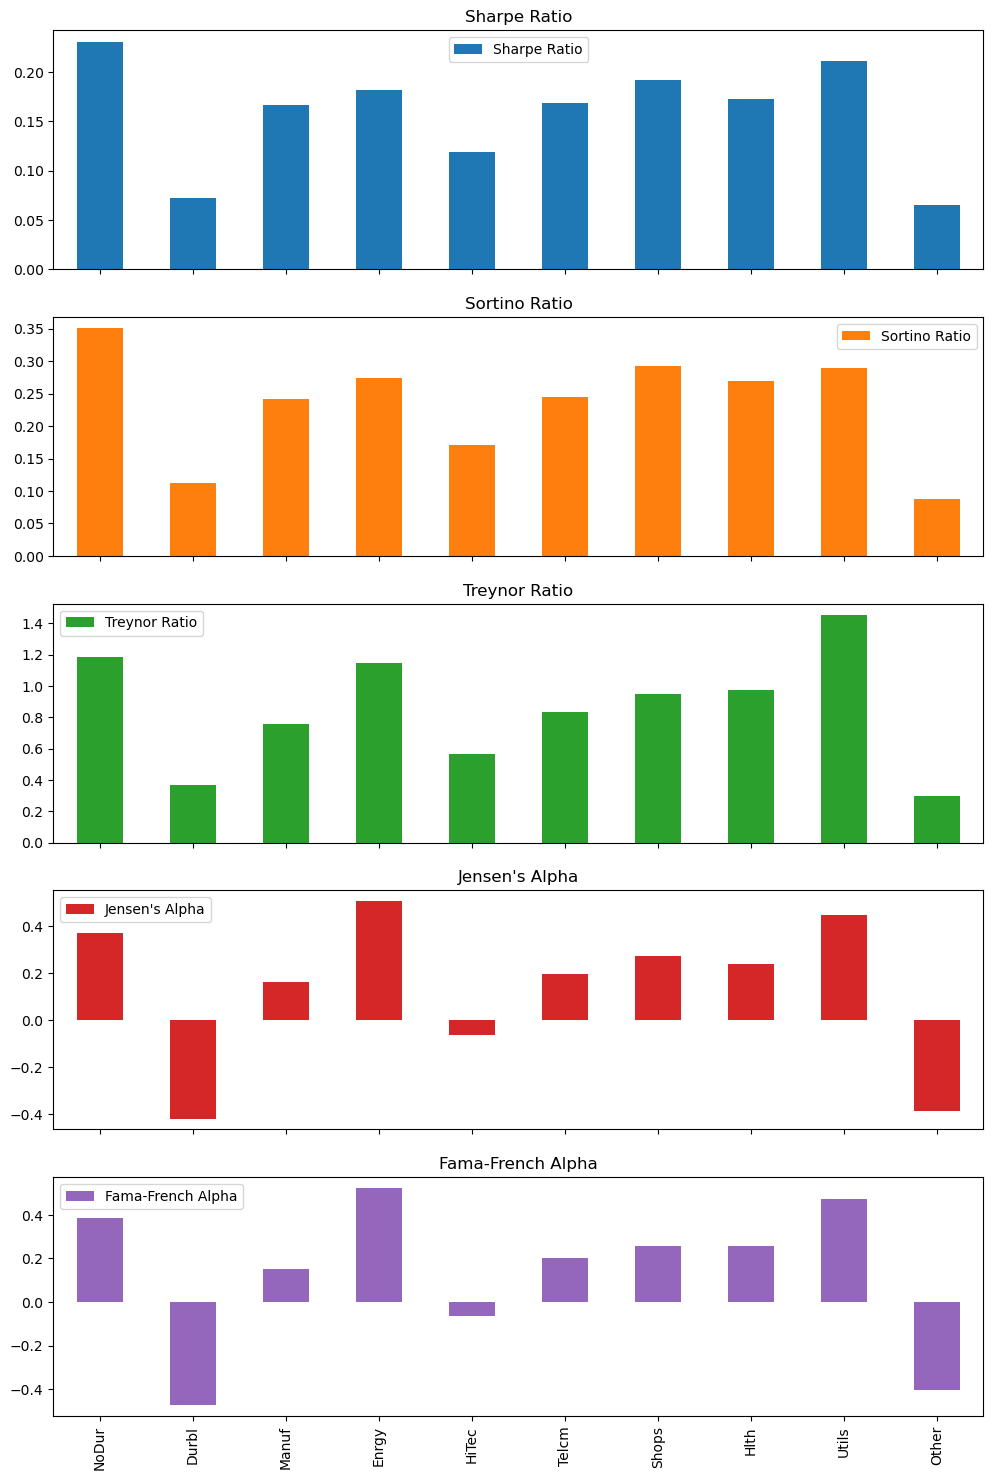

In [299]:
metrics.plot(
    subplots=True, 
    kind="bar", 
    figsize=(12,
             18), 
    title=["Sharpe Ratio",
           'Sortino Ratio', 
           'Treynor Ratio', 
           "Jensen's Alpha", 
           'Fama-French Alpha']
)